In [1]:
n_cores = -1

In [2]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [3]:
data = np.load('inga_out.npz')

In [4]:
mass = data['arr_0']
mass

array([ 552.293448,  338.046024,  724.221464, ...,  328.072907,
        262.19328 ,  636.278192])

In [5]:
name = data['arr_1']
name

array(['UNPD98266', 'UNPD207163', 'UNPD3499', ..., 'UNPD98267',
       'UNPD47332', 'UNPD101003'], dtype=object)

In [6]:
massabund = data['arr_2']
massabund

array([[  41.00329 ,    1.688456],
       [  43.01894 ,    2.135631],
       [  55.01894 ,    1.105409],
       ..., 
       [ 549.23414 ,   24.377134],
       [ 551.24979 ,   22.666363],
       [ 591.2447  ,    5.496205]])

In [7]:
blockind = data['arr_3']
blockind

array([     0,      0,      0, ..., 220988, 220988, 220988], dtype=uint32)

In [8]:
values = massabund[:,0]
values.shape

(5324089,)

In [9]:
values_sorted = np.sort(values)
values_sorted.shape

(5324089,)

### Plotting Splitting

In [10]:
def recurSplitting(arr, res, threshold):
    """
    A recursive method to split values into groups until 
    within each group there are no two consecutive values
    which have differences larger than the given threshold.
    """
    if threshold <= 0:
        raise ValueError('Threshold should be positive.')
    
    n = len(arr)
    maxInterval = -1
    maxIdx = -1
    for i in range(1,n):
        diff = arr[i] - arr[i-1]
        if diff > maxInterval:
            maxInterval = diff
            maxIdx = i
            
    if maxInterval < threshold:
        return
    else:
        res.append((arr[maxIdx-1]+arr[maxIdx])/2)
        arr1 = arr[0:maxIdx]
        recurSplitting(arr1, res, threshold)
        arr2 = arr[maxIdx:n]
        recurSplitting(arr2, res, threshold)

In [11]:
def splittingPlot(values, threshold):
    """
    Using splitting strategy to generate matrix.
    """
    splits = []
    recurSplitting(values, splits, threshold)
    splits.sort()
    mi_value = np.array(splits)
    print('number of groups: {}'.format(mi_value.size))
    
    plt.figure(figsize=(20,2))
    plt.plot(values, np.random.random(values.shape[0]), '+k')
    for s in mi_value:
        plt.axvline(x=s)
    plt.show()

### masses $\in [50,80]$

number of groups: 46


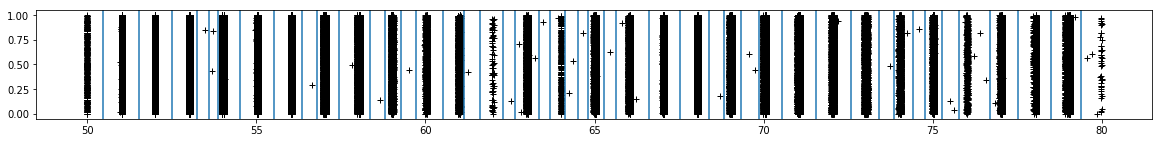

In [12]:
selected_values = values_sorted[(values_sorted>50) & (values_sorted<=80)]
splittingPlot(selected_values, 0.2)

number of groups: 63


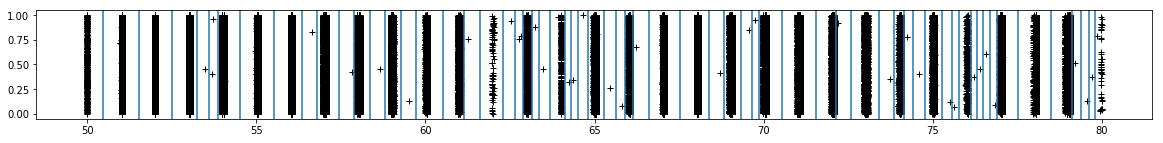

In [75]:
selected_values = values_sorted[(values_sorted>50) & (values_sorted<=80)]
splittingPlot(selected_values, 0.1)

number of groups: 67


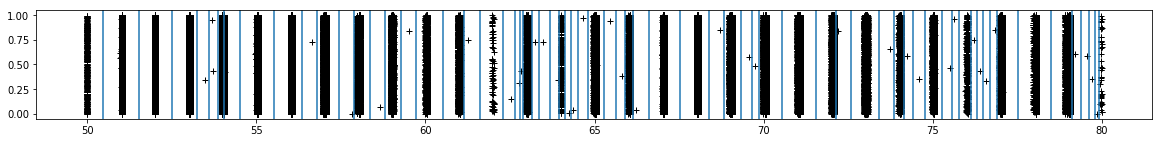

In [76]:
selected_values = values_sorted[(values_sorted>50) & (values_sorted<=80)]
splittingPlot(selected_values, 0.05)

### masses $\in [500,530]$

number of groups: 20


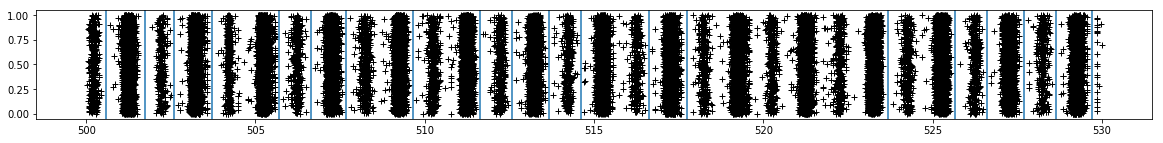

In [15]:
selected_values = values_sorted[(values_sorted>500) & (values_sorted<=530)]
splittingPlot(selected_values, 0.2)

number of groups: 48


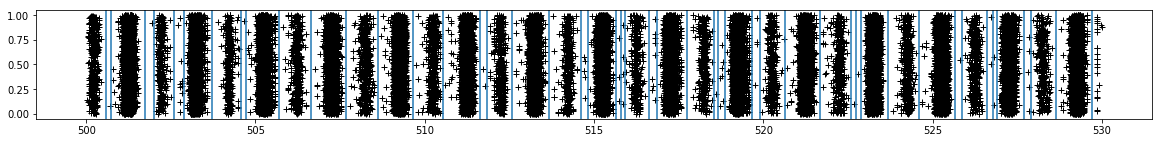

In [83]:
selected_values = values_sorted[(values_sorted>500) & (values_sorted<=530)]
splittingPlot(selected_values, 0.1)

number of groups: 84


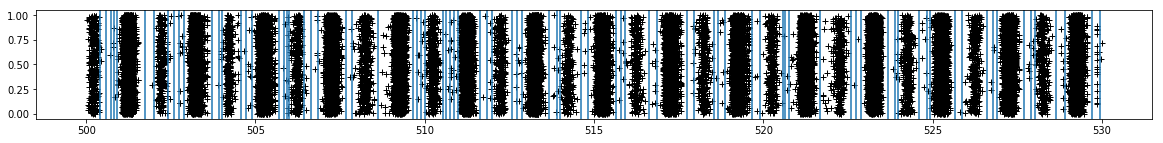

In [84]:
selected_values = values_sorted[(values_sorted>500) & (values_sorted<=530)]
splittingPlot(selected_values, 0.05)

### masses $\in [1000,1030]$

number of groups: 18


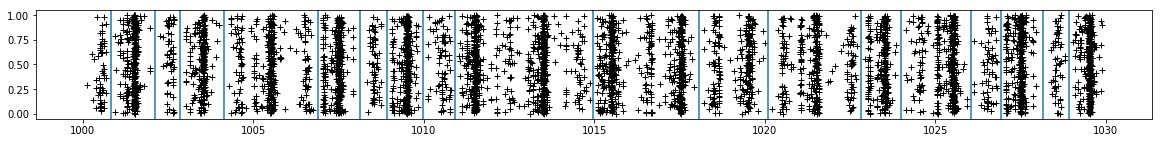

In [16]:
selected_values = values_sorted[(values_sorted>1000) & (values_sorted<=1030)]
splittingPlot(selected_values, 0.2)

number of groups: 53


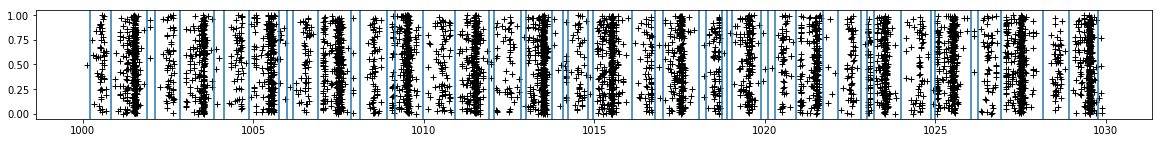

In [86]:
selected_values = values_sorted[(values_sorted>1000) & (values_sorted<=1030)]
splittingPlot(selected_values, 0.1)

number of groups: 121


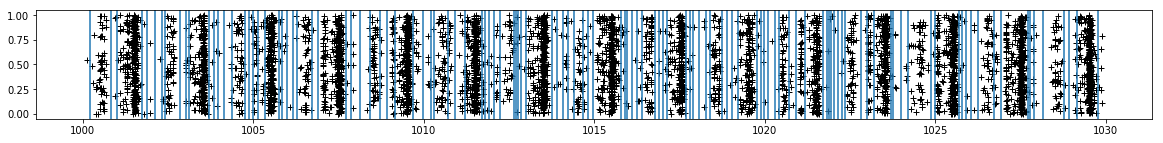

In [87]:
selected_values = values_sorted[(values_sorted>1000) & (values_sorted<=1030)]
splittingPlot(selected_values, 0.05)

### masses $\in [1500,1530]$

number of groups: 34


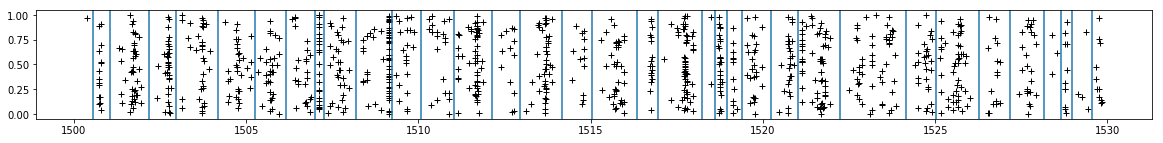

In [17]:
selected_values = values_sorted[(values_sorted>1500) & (values_sorted<=1530)]
splittingPlot(selected_values, 0.2)

number of groups: 77


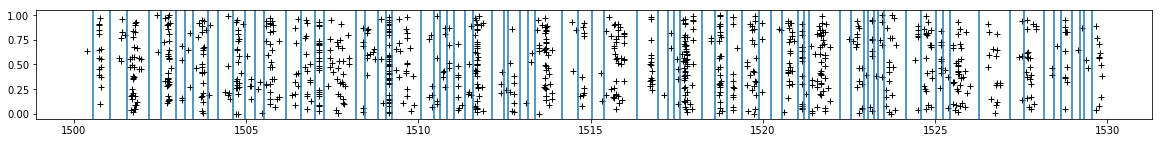

In [89]:
selected_values = values_sorted[(values_sorted>1500) & (values_sorted<=1530)]
splittingPlot(selected_values, 0.1)

number of groups: 144


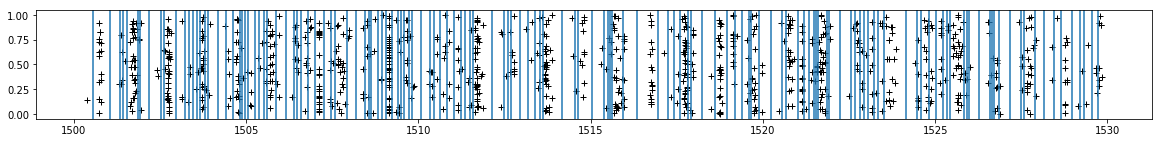

In [90]:
selected_values = values_sorted[(values_sorted>1500) & (values_sorted<=1530)]
splittingPlot(selected_values, 0.05)

### masses $\in [1970,2000]$

number of groups: 28


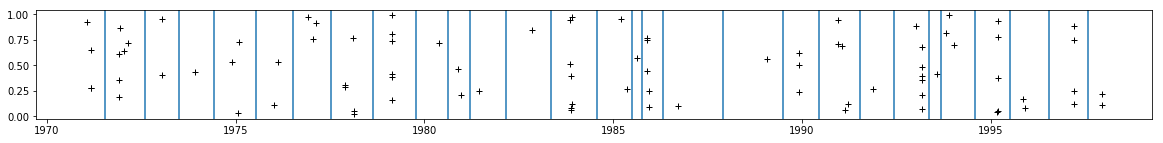

In [18]:
selected_values = values_sorted[(values_sorted>1970) & (values_sorted<=2000)]
splittingPlot(selected_values, 0.2)

number of groups: 37


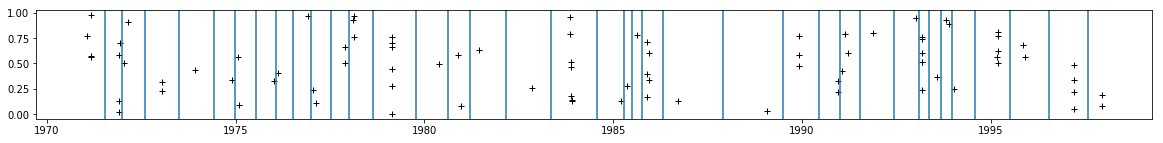

In [92]:
selected_values = values_sorted[(values_sorted>1970) & (values_sorted<=2000)]
splittingPlot(selected_values, 0.1)

number of groups: 44


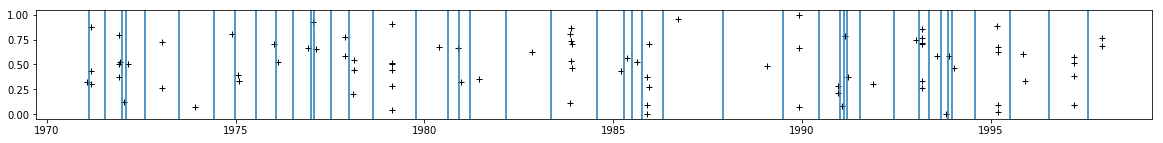

In [93]:
selected_values = values_sorted[(values_sorted>1970) & (values_sorted<=2000)]
splittingPlot(selected_values, 0.05)